<a href="https://colab.research.google.com/github/EdonFetaji/DataScience/blob/main/labs/Lab_3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [15]:
data= yf.download('AAPL',start='2003-01-01')

[*********************100%***********************]  1 of 1 completed


In [16]:
data.columns = data.columns.get_level_values(0)

In [17]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2003-01-02,0.222938,0.264286,0.266429,0.256250,0.256429,181428800
2003-01-03,0.224444,0.266071,0.266607,0.260536,0.264286,147453600
2003-01-06,0.224444,0.266071,0.274643,0.265714,0.268393,390532800
2003-01-07,0.223691,0.265179,0.267857,0.258393,0.264107,342344800
2003-01-08,0.219171,0.259821,0.262679,0.257857,0.260357,229644800
...,...,...,...,...,...,...
2024-12-06,242.839996,242.839996,244.630005,242.080002,242.910004,36870600
2024-12-09,246.750000,246.750000,247.240005,241.750000,241.830002,44649200
2024-12-10,247.770004,247.770004,248.210007,245.339996,246.889999,36914800


In [18]:
data=data[['Close','Volume']]

In [20]:
for i in range(1,6):
  data[f"Close_lag_{i}"] = data['Close'].shift(i)

In [23]:
data = data.dropna()

In [24]:
data.head()

Price,Close,Volume,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5
Date,,,,,,,
2003-01-09,0.262143,215252800,0.259821,0.265179,0.266071,0.266071,0.264286
2003-01-10,0.262857,175100800,0.262143,0.259821,0.265179,0.266071,0.266071
2003-01-13,0.261250,178942400,0.262857,0.262143,0.259821,0.265179,0.266071
2003-01-14,0.260893,186860800,0.261250,0.262857,0.262143,0.259821,0.265179
2003-01-15,0.257679,371128800,0.260893,0.261250,0.262857,0.262143,0.259821


In [26]:
x = data.drop(columns=['Close'])
y= data['Close']

In [27]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,shuffle=False)

In [28]:
def scale_data(train_x,test_x):
  scaler = StandardScaler()

  train_x_scaled = scaler.fit_transform(train_x)
  test_x_scaled = scaler.transform(test_x)

  return train_x_scaled,test_x_scaled


In [35]:
def evaluate_prediction(orig_y,pred_y):
  print(f"MSE: ",mean_squared_error(orig_y,pred_y))
  print(f"MAE: ",mean_absolute_error(orig_y,pred_y))
  print(f"R2: ",r2_score(orig_y,pred_y))

In [29]:
train_x_scaled,test_x_scaled = scale_data(train_x,test_x)

# NEURAL NETWORK regression model, FROM ***SKLEARN***

In [45]:
snn = MLPRegressor(hidden_layer_sizes=(100,100),max_iter=100,activation='relu',solver='adam',learning_rate_init=0.001)

In [46]:
snn.fit(train_x_scaled,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=100)

In [48]:
snn_pred_y = snn.predict(test_x_scaled)

# NEURAL NETWORK FROM ***KERAS***

In [40]:
knn = Sequential()
knn.add(Dense(100,input_dim=x.shape[1],activation='relu'))
knn.add(Dense(100,activation='relu'))
# Output layer
knn.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
knn.compile(optimizer=Adam(learning_rate=0.001),loss='mse',metrics=['mae'])

In [52]:
history = knn.fit(train_x_scaled,train_y,epochs=100,batch_size=32)

Epoch 1/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3216 - mae: 0.2987
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2390 - mae: 0.2609
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2983 - mae: 0.2736
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3398 - mae: 0.2946
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2778 - mae: 0.2660
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2997 - mae: 0.2975
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2949 - mae: 0.2796
Epoch 8/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3313 - mae: 0.2980
Epoch 9/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2968 - mae: 0.2761
Epoch 10/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3537 - mae: 0.3189
Epoch 11/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3341 - mae: 0.2958
Epoch 12/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3504 - mae: 0.3103
Epoch 13/100


In [49]:
knn_pred_y = snn.predict(test_x_scaled)


In [50]:
evaluate_prediction(test_y,snn_pred_y)

MSE:  16.98986780524094
MAE:  3.1901452747387062
R2:  0.9833474250808045


In [51]:
evaluate_prediction(test_y,knn_pred_y)


MSE:  16.98986780524094
MAE:  3.1901452747387062
R2:  0.9833474250808045


Both are just as good, although keras give you more control over training the neural network, because you define each layer manually.
Plus you can plot the mse over the epochs, which sklearn doesnt natively support

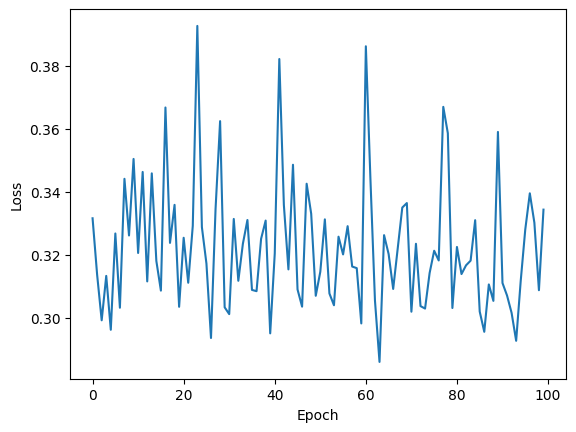

In [54]:
plt.plot(history.history['loss'],label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()